In [85]:
# Read the dataset, ionosphere dataset is used
import pandas as pd 

X = pd.read_csv('ionosphere.csv')
X.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [86]:
# Build the ATOM Classifier for performing the classification task 
from atom import ATOMClassifier
atom = ATOMClassifier(X, y='class', test_size = 0.3, verbose = 2)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (351, 35)
Memory: 115.96 kB
Scaled: False
Outlier values: 44 (0.5%)
Duplicate samples: 1 (0.3%)
-------------------------------------
Train set size: 246
Test set size: 105
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| b |   126 (1.0) |    88 (1.0) |    38 (1.0) |
| g |   225 (1.8) |   158 (1.8) |    67 (1.8) |



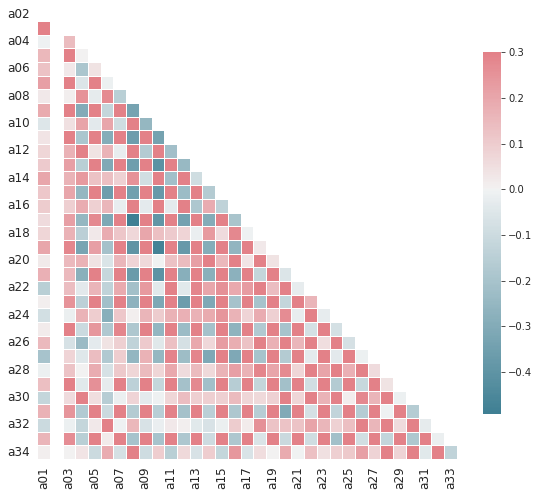

In [87]:
# Plotting correlation between the various features
atom.plot_correlation()

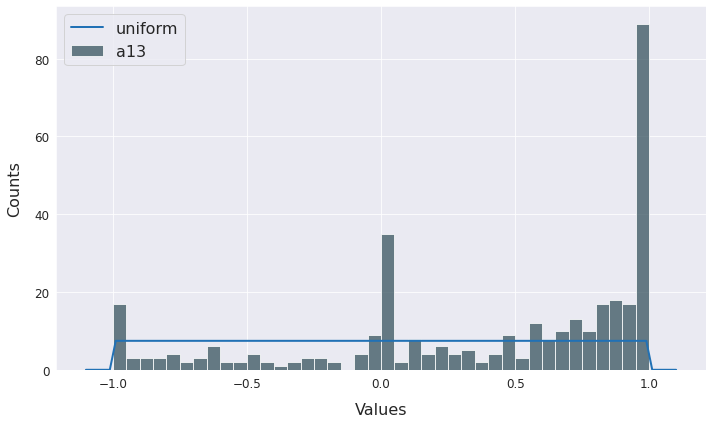

In [88]:
# Visualizing how the feature values fit under different distributions
atom.distribution(columns='a13')
atom.plot_distribution(columns='a13', distributions='uniform')

In [89]:
atom.clean()

Cleaning the data...
 --> Dropping feature a02 due to minimum cardinality. Contains only 1 class: 0.
 --> Label-encoding the target column.


In [90]:
# Data clean up for missing values, the missing numerical values are replaced with the median of the column and the missing categorical
# values are replaced with the frequently occuring value in the column
# Imputing is done only on the training set
atom.impute(strat_num="median", strat_cat="most_frequent")

Fitting Imputer...
Imputing missing values...


In [91]:
# Encoding the categorical values
atom.encode(strategy='leaveoneout')

Fitting Encoder...
Encoding categorical columns...


In [92]:
# View dataset from the atom classifier
atom.dataset

,a01,a03,a04,a05,a06,a07,a08,a09,a10,a11,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,1.00000,0.16195,1.00000,-0.05558,1.00000,0.01373,1.00000,-0.12352,1.00000,...,-0.22978,1.00000,-0.06823,1.00000,0.08299,1.00000,-0.14194,1.00000,-0.07439,1
1,1,0.94631,0.17498,0.90946,0.33143,0.85096,0.49960,0.73678,0.63842,0.59215,...,0.76482,-0.58563,0.66335,-0.67929,0.52564,-0.75321,0.42488,-0.81210,0.26092,1
2,1,1.00000,0.04078,1.00000,0.11982,1.00000,0.16159,1.00000,0.27921,0.98703,...,0.59723,0.58903,0.60990,0.53952,0.60932,0.45312,0.63636,0.40442,0.62658,1
3,1,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,0
4,1,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,-1.00000,...,0.43750,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.90547,0.41113,0.65354,0.74761,0.29921,0.95905,-0.13342,0.97820,-0.52236,...,-0.85368,0.67538,-0.61959,0.85977,-0.28123,0.88654,0.09800,0.75495,0.46301,1
347,1,0.94052,-0.01531,0.94170,0.01001,0.94994,-0.01472,0.95878,-0.01060,0.94641,...,-0.04476,0.92695,-0.05827,0.90342,-0.07479,0.91991,-0.07244,0.92049,-0.07420,1
348,1,0.82254,-0.07572,0.80462,0.00231,0.87514,-0.01214,0.86821,-0.07514,0.72832,...,-0.02370,0.76717,-0.02731,0.74046,-0.07630,0.70058,-0.04220,0.78439,0.01214,1
349,1,1.00000,0.06655,1.00000,-0.18388,1.00000,-0.27320,1.00000,-0.43107,1.00000,...,-0.89128,0.47211,-0.86500,0.40303,-0.83675,0.30996,-0.89093,0.22995,-0.89158,1


In [93]:
# Fit logistic regression, random forest models and evaluate using F1 score
atom.run(models=['RF','LR'], metric='f1')


Training ========================= >>
Models: RF, LR
Metric: f1


Results for Random Forest:
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.964
Time elapsed: 0.288s
-------------------------------------------------
Total time: 0.288s


Results for Logistic Regression:
Fit ---------------------------------------------
Train evaluation --> f1: 0.9506
Test evaluation --> f1: 0.9286
Time elapsed: 0.070s
-------------------------------------------------
Total time: 0.071s


Final results ==================== >>
Duration: 0.363s
-------------------------------------
Random Forest       --> f1: 0.964 !
Logistic Regression --> f1: 0.9286


In [94]:
# View the best fit model
atom.RF

Random Forest
 --> Estimator: RandomForestClassifier
 --> Evaluation: f1: 0.964

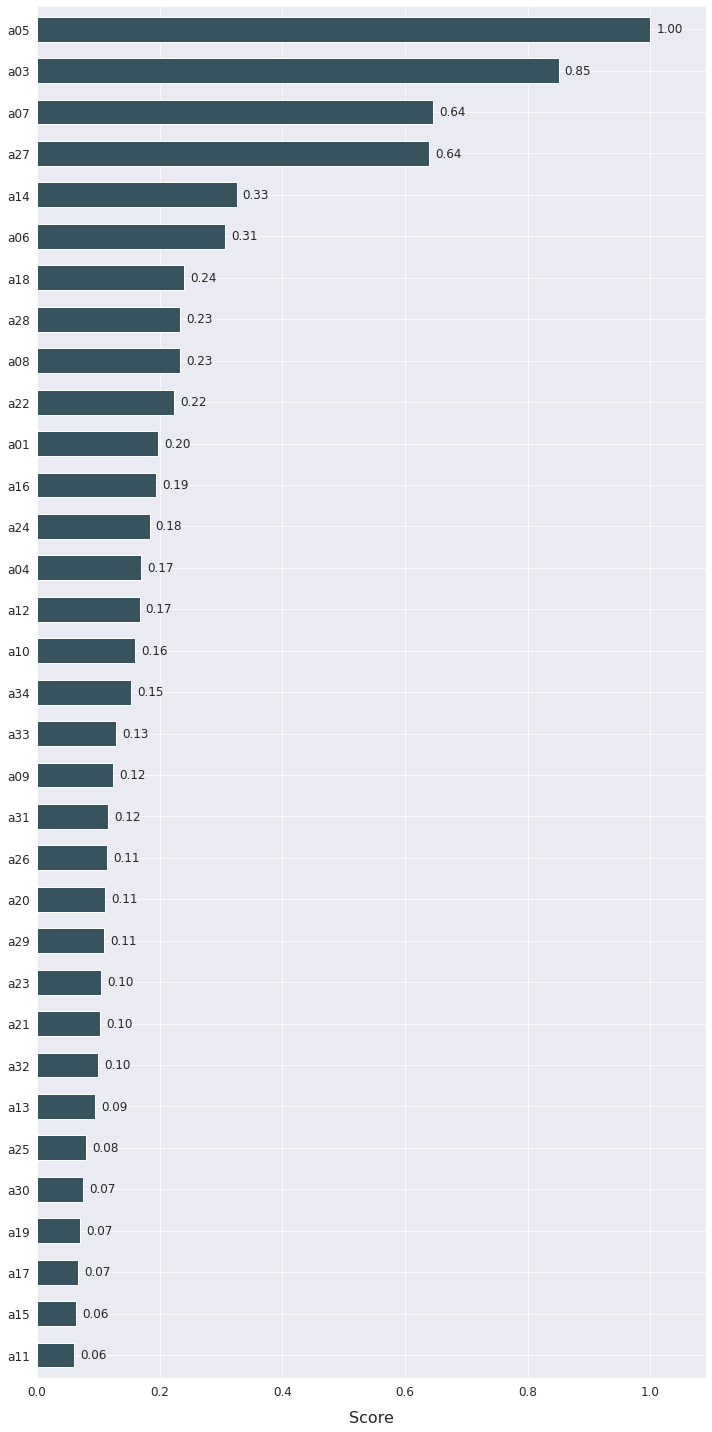

In [95]:
# Plot the importance of each feature in the prediction
atom.RF.plot_feature_importance()

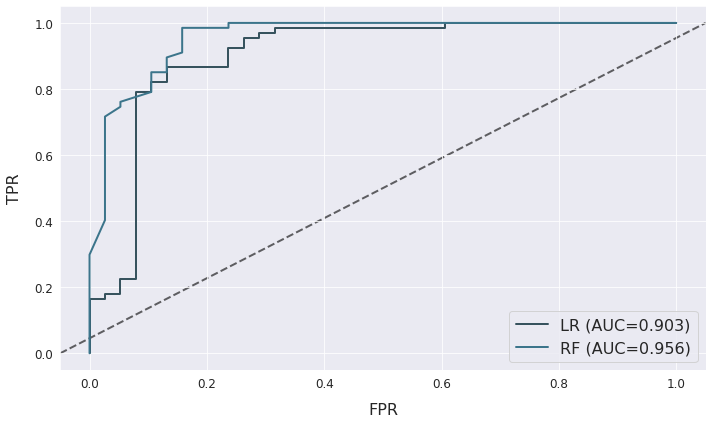

In [73]:
# Plotting ROC
atom.plot_roc()

In [96]:
# Evaluate the models based on various metrics
atom.evaluate()

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
RF,0.952381,0.997211,0.934211,0.964029,0.930556,0.898952,0.930556,1.000000,0.994894
LR,0.904762,0.929584,0.879811,0.928571,0.866667,0.793032,0.890411,0.970149,0.910841
